In [1]:
import cv2
import numpy as np
import PIL
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

import coremltools

In [2]:
yolop1 = coremltools.models.MLModel('./yolop1.mlmodel')
yolop2 = coremltools.models.MLModel('./yolop2.mlmodel')
yolop3 = coremltools.models.MLModel('./yolop3.mlmodel')

In [3]:
modelp1 = coremltools.models.MLModel('./TinyYOLOv1P1.mlmodel')
modelp2 = coremltools.models.MLModel('./TinyYOLOv1P2.mlmodel')
modelp3 = coremltools.models.MLModel('./TinyYOLOv1P3.mlmodel')

In [13]:
im = Image.open('test1.jpg')
im = im.resize((448,448),PIL.Image.ANTIALIAS)

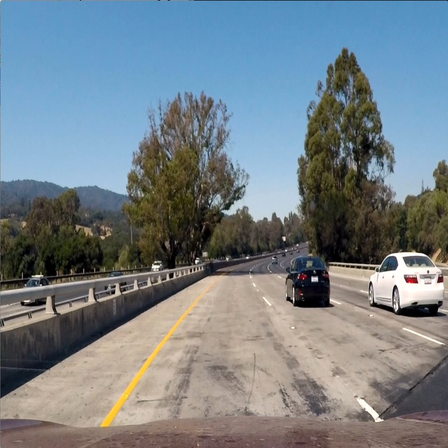

In [14]:
im

In [15]:
yolop1_out = yolop1.predict({'image': im})

In [16]:
modelp1_out = modelp1.predict({'image':im})

In [17]:
yolop1_out['interOut'].shape

(1024, 7, 7)

In [18]:
modelp1_out['yolo_p1_out'].shape

(1024, 7, 7)

In [19]:
np.linalg.norm(yolop1_out['interOut']-modelp1_out['yolo_p1_out'])

0.038222170750429725

In [22]:
yolop2_out = yolop2.predict({'interIn':yolop1_out['interOut']})

In [23]:
modelp2_out = modelp2.predict(modelp1_out)

In [25]:
yolop2_out

{u'flattenOut': array([ 0.02124447,  0.00647737,  0.00663746, ..., -0.00732341,
        -0.00589081, -0.0031073 ])}

In [26]:
modelp2_out

{u'yolo_p2_out': array([ 0.02124759,  0.00646378,  0.00663456, ..., -0.00734631,
        -0.00593692, -0.00313337])}

In [27]:
np.linalg.norm(yolop2_out['flattenOut']-modelp2_out['yolo_p2_out'])

0.038222170750429725